**Import the Required Libraries**

In [4]:
!pip install scikit-learn==1.6.1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**Load Dataset**

In [6]:
df = pd.read_csv('/content/insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

<Axes: xlabel='region', ylabel='count'>

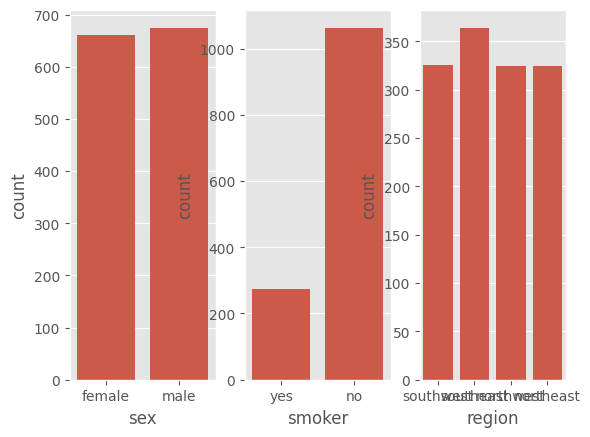

In [15]:
features = ['sex', 'smoker', 'region']
plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df)
plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)
plt.subplot(1, 3, 3 )
sns.countplot(x='region', data=df)


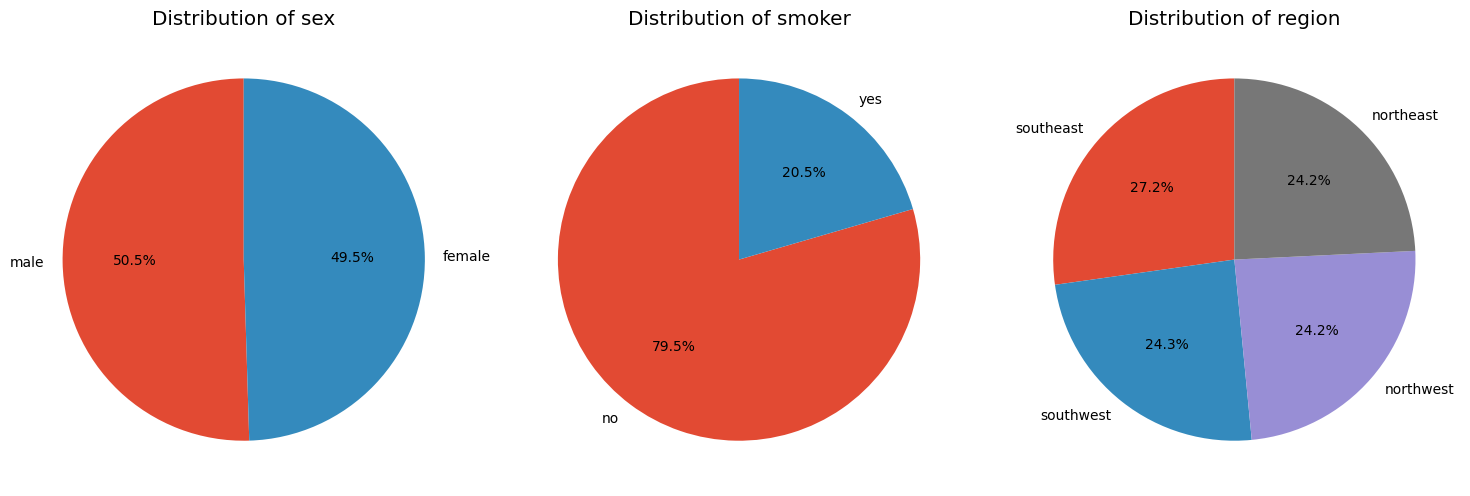

In [16]:


import matplotlib.pyplot as plt



# Calculate counts for each feature
feature_counts = {}
for feature in features:
    feature_counts[feature] = df[feature].value_counts()

# Create subplots for each feature's pie chart
fig, axes = plt.subplots(1, len(features), figsize=(15, 15))

# Iterate through features and create pie charts
for i, feature in enumerate(features):
    axes[i].pie(feature_counts[feature], labels=feature_counts[feature].index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


<ipython-input-17-91ab4701ea73>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
<ipython-input-17-91ab4701ea73>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])
<ipython-input-17-91ab4701ea73>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

<Axes: xlabel='children', ylabel='Density'>

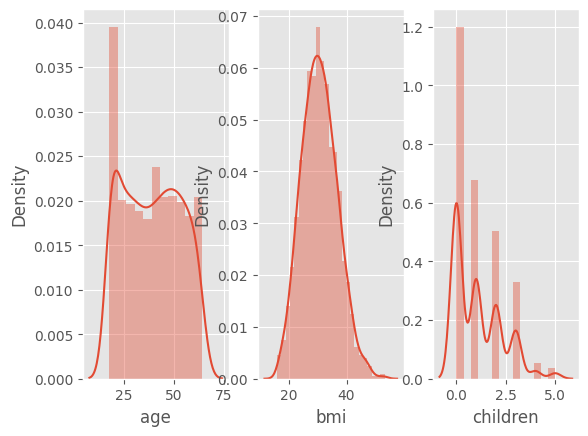

In [17]:
features_2 = ['age', 'bmi', 'children', 'region', 'smoker', 'sex']
plt.subplot(1, 3, 1)
sns.distplot(df['age'])
plt.subplot(1, 3, 2)
sns.distplot(df['bmi'])
plt.subplot(1, 3, 3)
sns.distplot(df['children'])




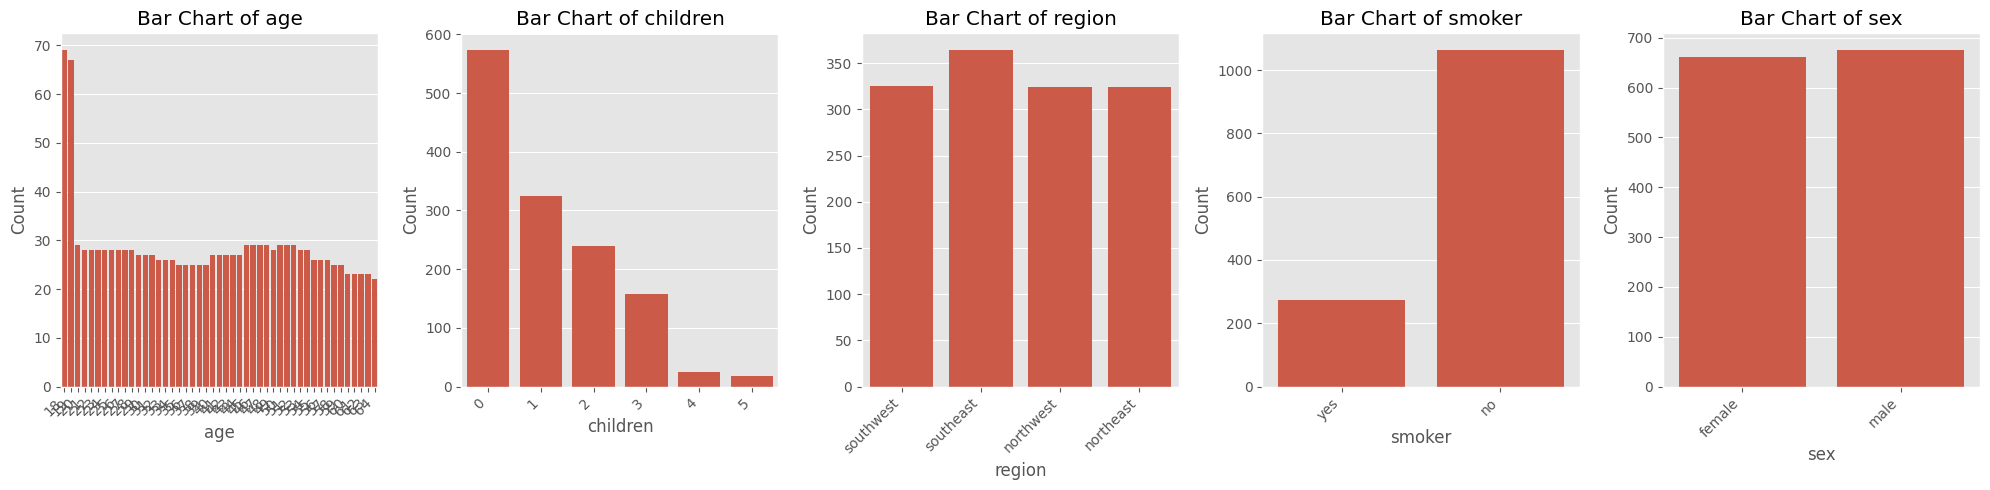

In [18]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


features_2 = ['age', 'children', 'region', 'smoker', 'sex']
fig, axes = plt.subplots(1, len(features_2), figsize=(20, 5)) # Increased figure size

for i, feature in enumerate(features_2):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Bar Chart of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right", fontsize=10) # Increased fontsize and rotated labels
    plt.tight_layout() # Adjust layout to prevent overlapping

plt.show()


<ipython-input-19-65a84b0ec08f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='charges', data=df, palette='viridis', estimator=sum) # Using 'viridis' color palette


<Figure size 1500x800 with 0 Axes>

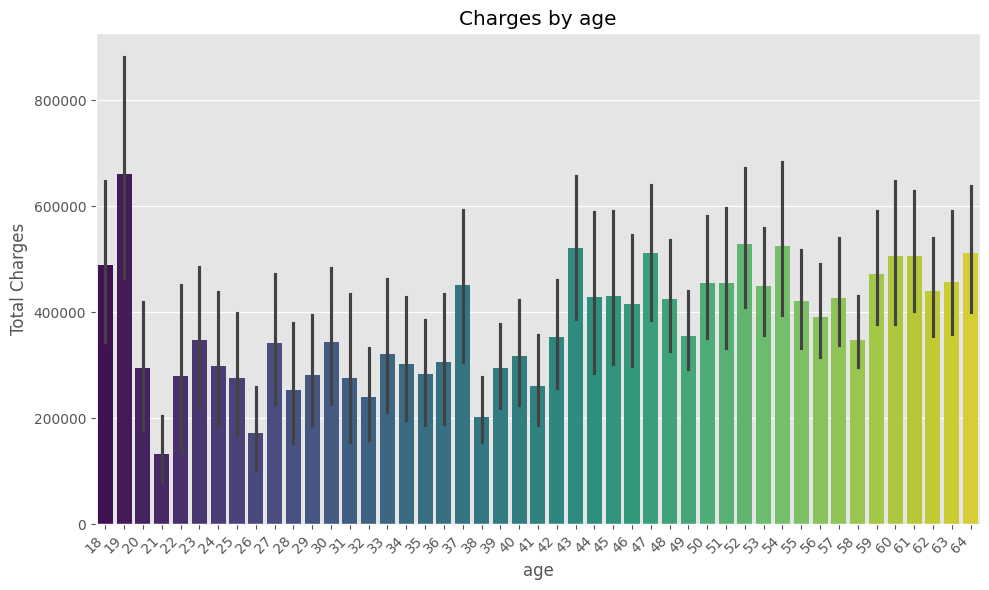

<ipython-input-19-65a84b0ec08f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='charges', data=df, palette='viridis', estimator=sum) # Using 'viridis' color palette


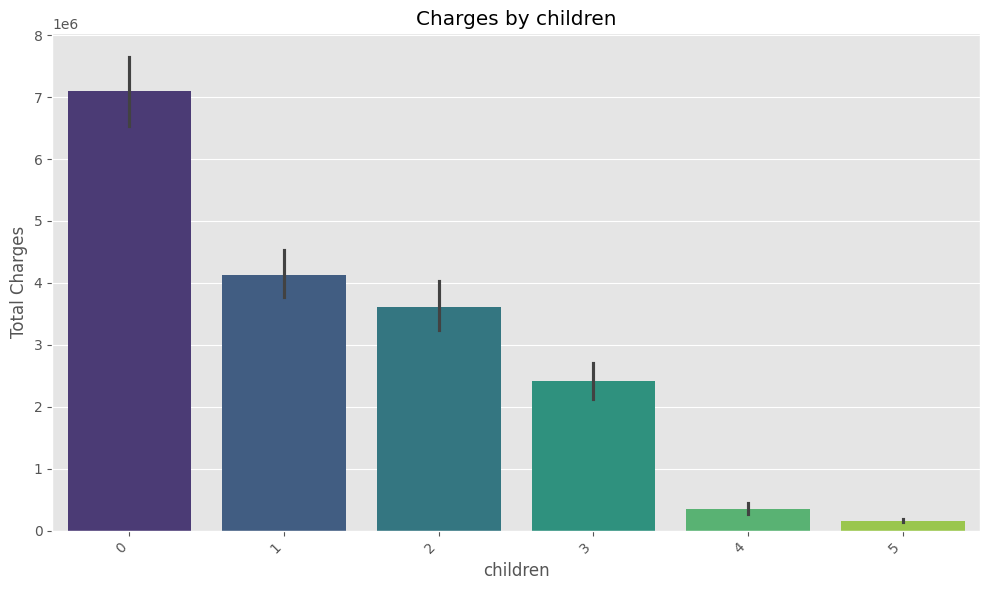

<ipython-input-19-65a84b0ec08f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='charges', data=df, palette='viridis', estimator=sum) # Using 'viridis' color palette


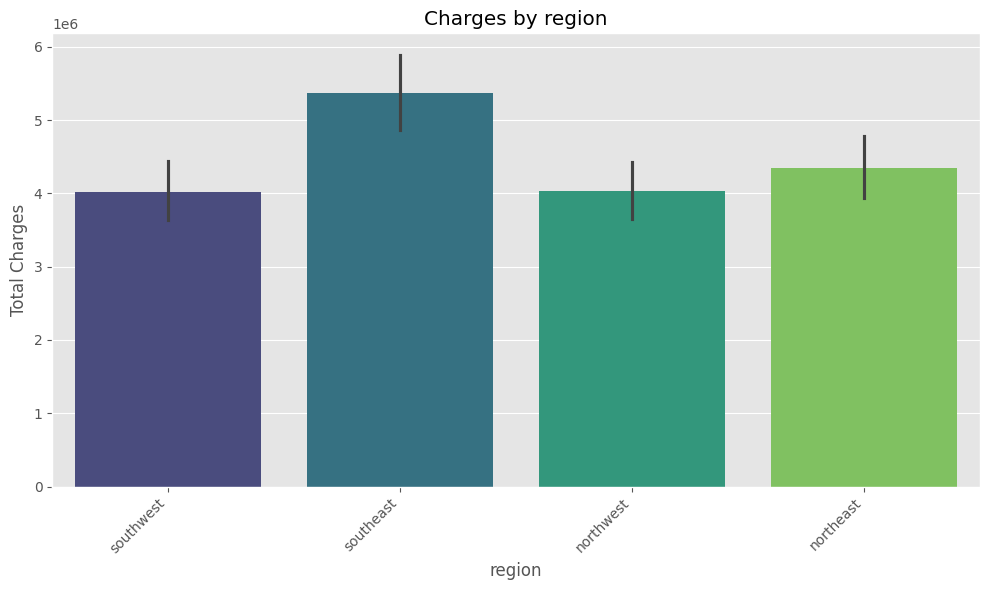

<ipython-input-19-65a84b0ec08f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='charges', data=df, palette='viridis', estimator=sum) # Using 'viridis' color palette


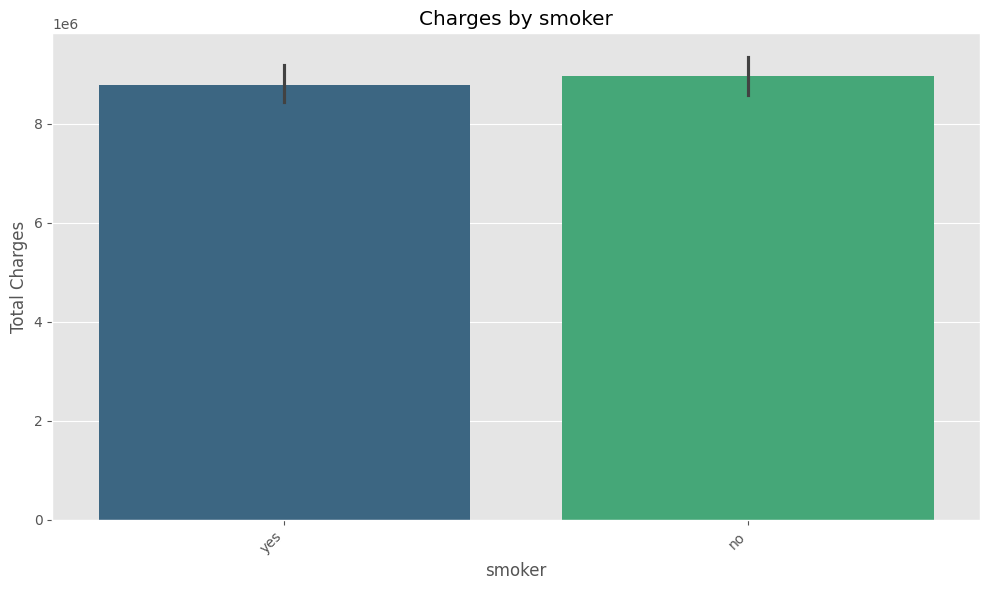

<ipython-input-19-65a84b0ec08f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='charges', data=df, palette='viridis', estimator=sum) # Using 'viridis' color palette


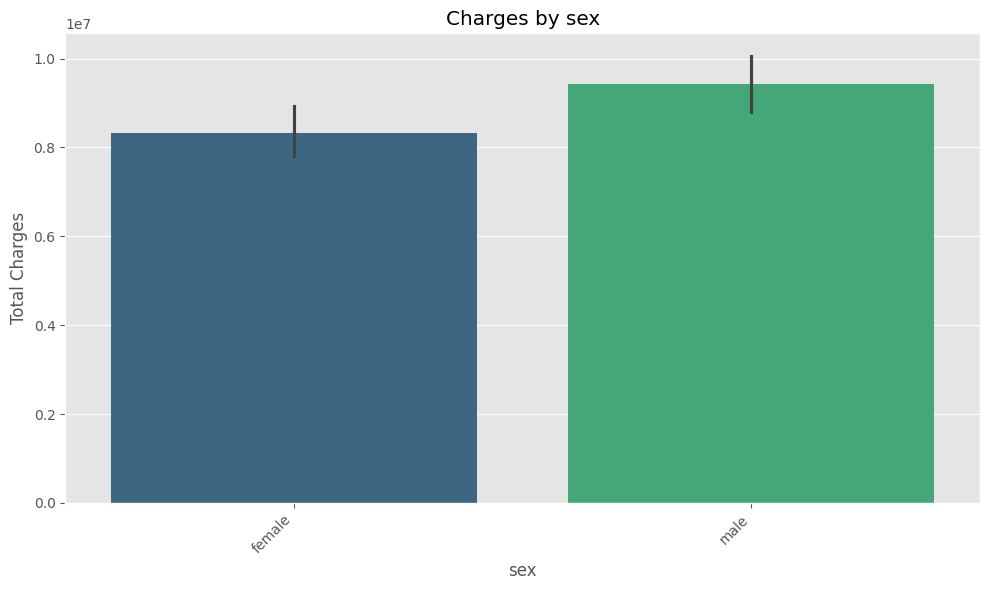

In [19]:


import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(15, 8))  # Adjust figure size for better visualization

for feature in features_2:
    plt.figure(figsize=(10, 6))  # Individual figure size for each barplot
    sns.barplot(x=feature, y='charges', data=df, palette='viridis', estimator=sum) # Using 'viridis' color palette
    plt.title(f'Charges by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total Charges')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Ensures labels fit within figure
    plt.show()


In [20]:


# Calculate the IQR for 'bmi'
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Print or further analyze the outliers
outliers


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


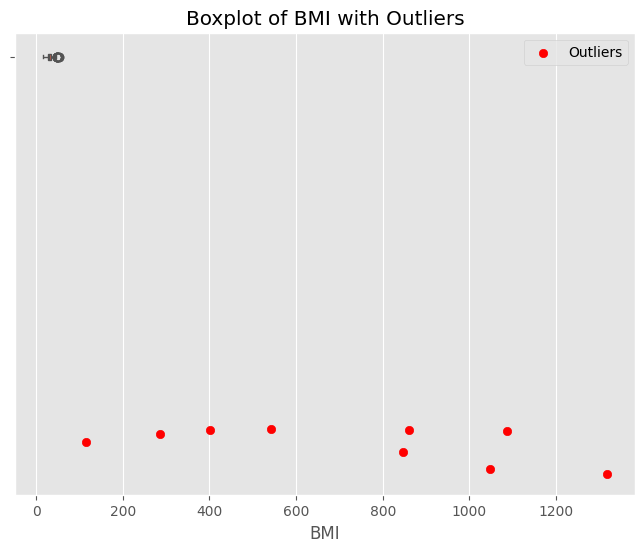

In [21]:


import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI with Outliers')
plt.xlabel('BMI')

# Highlight the outliers
plt.scatter(outliers.index, outliers['bmi'], color='red', label='Outliers')

plt.legend()
plt.show()


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


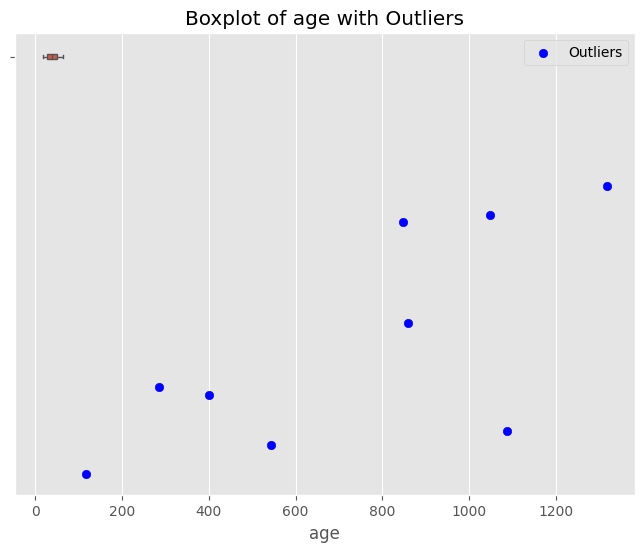

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of age with Outliers')
plt.xlabel('age')

# Highlight the outliers
plt.scatter(outliers.index, outliers['age'], color='blue', label='Outliers')

plt.legend()
plt.show()


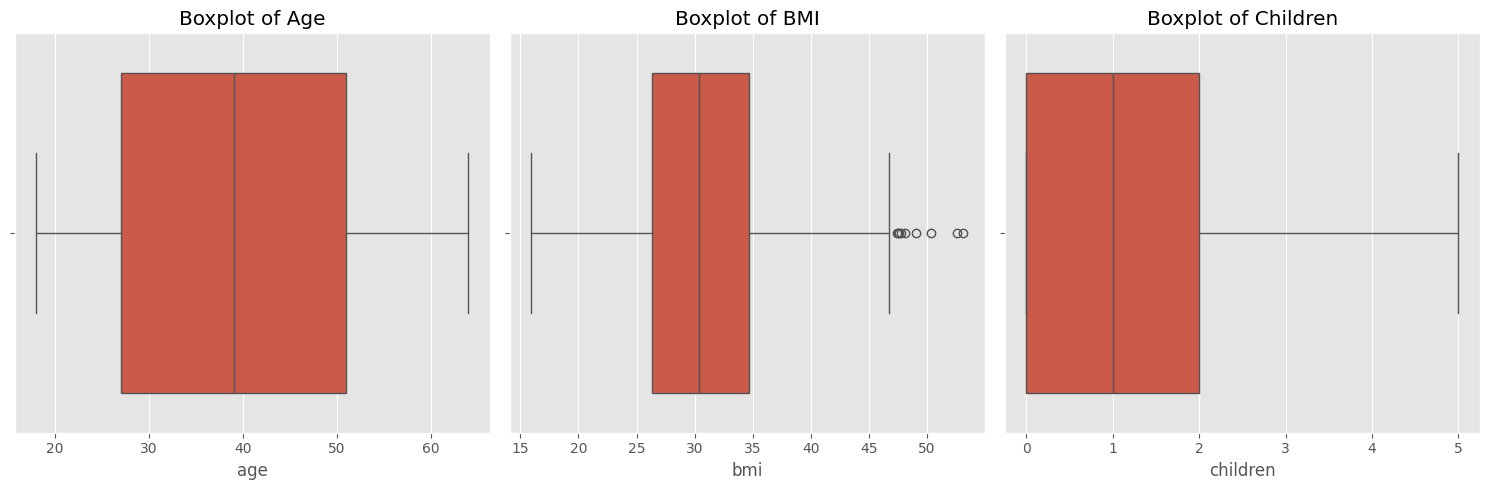

In [24]:


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['children'])
plt.title('Boxplot of Children')

plt.tight_layout()
plt.show()


In [25]:


# Remove outliers
df_no_outliers = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Print or further analyze the data without outliers
df_no_outliers.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Outliers in the outlier-removed dataset:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


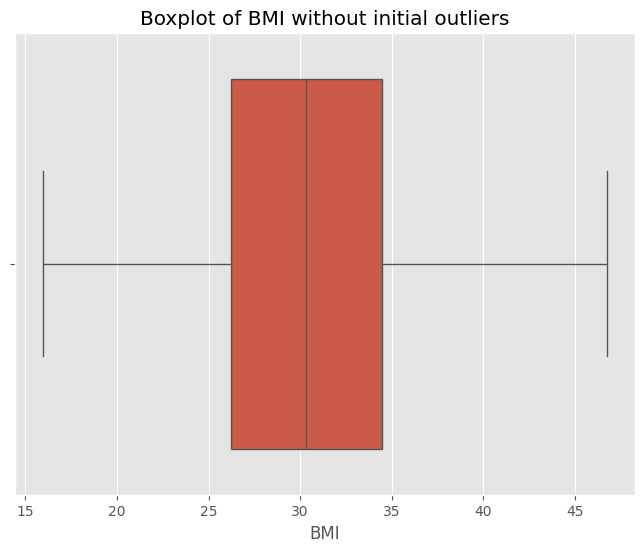

In [26]:


# Calculate the IQR for 'bmi' in the outlier-removed dataset
Q1_no_outliers = df_no_outliers['bmi'].quantile(0.25)
Q3_no_outliers = df_no_outliers['bmi'].quantile(0.75)
IQR_no_outliers = Q3_no_outliers - Q1_no_outliers

# Define bounds for outliers in the outlier-removed dataset
lower_bound_no_outliers = Q1_no_outliers - 1.5 * IQR_no_outliers
upper_bound_no_outliers = Q3_no_outliers + 1.5 * IQR_no_outliers

# Identify outliers in the outlier-removed dataset (should ideally be none)
outliers_no_outliers = df_no_outliers[(df_no_outliers['bmi'] < lower_bound_no_outliers) | (df_no_outliers['bmi'] > upper_bound_no_outliers)]

# Print or further analyze the outliers in the outlier-removed dataset
print("Outliers in the outlier-removed dataset:")
print(outliers_no_outliers)

# Create a boxplot of 'bmi' in the outlier-removed dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['bmi'])
plt.title('Boxplot of BMI without initial outliers')
plt.xlabel('BMI')
plt.show()


In [27]:
df.shape

(1337, 7)

In [28]:
df_no_outliers.shape

(1328, 7)

In [29]:
df['bmi'].skew()

0.28391419385321137

In [30]:
df_no_outliers['bmi'].skew()

0.15714074884049561

In [31]:
df['age'].skew()

0.054780773126998195

In [32]:
df_no_outliers['age'].skew()

0.057520907909550154

In [33]:


from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the categorical columns and apply label encoding
for col in ['sex', 'smoker', 'region']:
    df_no_outliers[col] = le.fit_transform(df_no_outliers[col])

# Display the updated DataFrame
df_no_outliers.head()


<ipython-input-33-e8276628eeb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = le.fit_transform(df_no_outliers[col])
<ipython-input-33-e8276628eeb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = le.fit_transform(df_no_outliers[col])
<ipython-input-33-e8276628eeb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [34]:
df_no_outliers.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [35]:
df_no_outliers.info()
#

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   bmi       1328 non-null   float64
 3   children  1328 non-null   int64  
 4   smoker    1328 non-null   int64  
 5   region    1328 non-null   int64  
 6   charges   1328 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.0 KB


In [36]:
df_no_outliers.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.018089,0.114785,0.042103,-0.025075,0.002306,0.301317
sex,-0.018089,1.000000,0.039966,0.019973,0.080269,0.003311,0.064161
bmi,0.114785,0.039966,1.000000,0.017366,-0.002868,0.155863,0.193270
children,0.042103,0.019973,0.017366,1.000000,0.007234,0.017331,0.069125
smoker,-0.025075,0.080269,-0.002868,0.007234,1.000000,-0.005359,0.785896
region,0.002306,0.003311,0.155863,0.017331,-0.005359,1.000000,-0.011072
charges,0.301317,0.064161,0.193270,0.069125,0.785896,-0.011072,1.000000


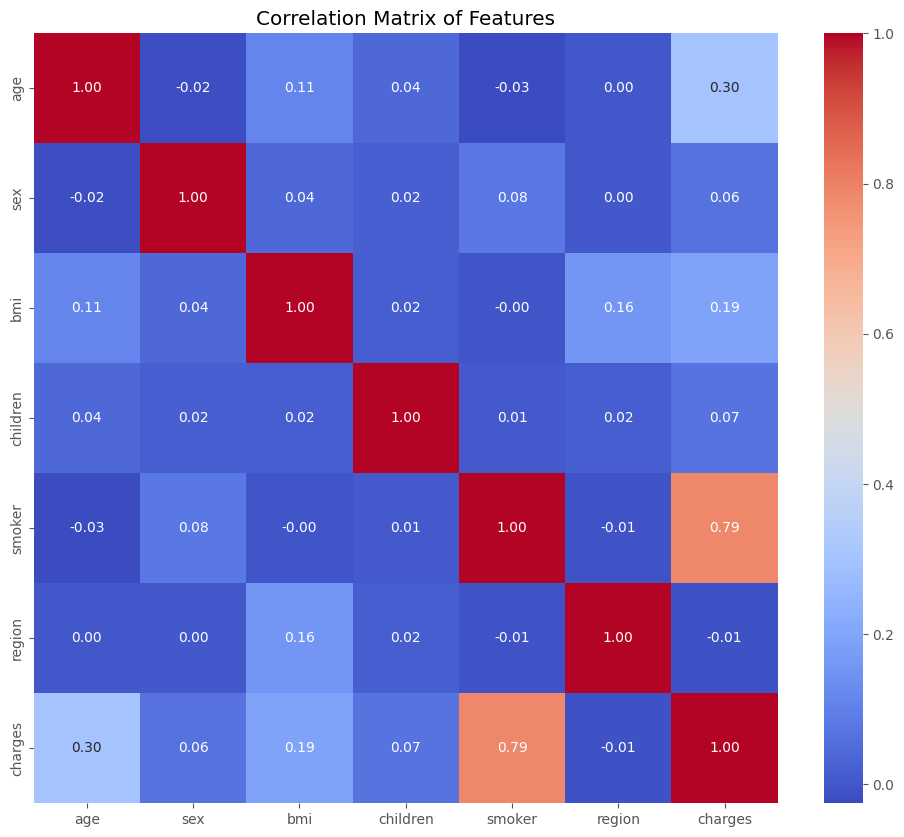

In [37]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [38]:


# Define features (X) and target (y)
x = df_no_outliers.drop('charges', axis=1)
y = df_no_outliers['charges']


In [39]:

## Import the Regression Ml Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [40]:


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Neighbors Regression': KNeighborsRegressor(),
    'Gaussian Process Regression': GaussianProcessRegressor(),
    'XGBoost Regression': XGBRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)  # Fit the model
    print(f'{name} trained successfully.')


Linear Regression trained successfully.
Ridge Regression trained successfully.
Lasso Regression trained successfully.
Elastic Net Regression trained successfully.
Decision Tree Regression trained successfully.
Random Forest Regression trained successfully.
Gradient Boosting Regression trained successfully.
Support Vector Regression trained successfully.
K-Neighbors Regression trained successfully.
Gaussian Process Regression trained successfully.
XGBoost Regression trained successfully.


In [42]:
# prompt: check the training acurracy, test accuracy and cross validation score for all the models

# Evaluate the models
for name, model in models.items():
    y_pred = model.predict(x_test)

    # Training accuracy
    train_pred = model.predict(x_train)
    train_accuracy = r2_score(y_train, train_pred)

    # Test accuracy
    test_accuracy = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')  # Use 5-fold cross-validation

    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")
    print("-" * 30)


Model: Linear Regression
Training Accuracy: 0.7505837312789694
Test Accuracy: 0.7444762584926317
Cross-Validation Scores: [0.76260136 0.71184353 0.77313723 0.72781112 0.75665632]
Mean Cross-Validation Score: 0.7464099135301827
------------------------------
Model: Ridge Regression
Training Accuracy: 0.7505628043991825
Test Accuracy: 0.7446423801596234
Cross-Validation Scores: [0.76269112 0.71212572 0.77259445 0.72819376 0.75634147]
Mean Cross-Validation Score: 0.7463893062159047
------------------------------
Model: Lasso Regression
Training Accuracy: 0.7505836430932769
Test Accuracy: 0.7445002822250669
Cross-Validation Scores: [0.76262009 0.71186801 0.77311806 0.72782109 0.75665325]
Mean Cross-Validation Score: 0.7464160995095106
------------------------------
Model: Elastic Net Regression
Training Accuracy: 0.3903572347394143
Test Accuracy: 0.4161481764223687
Cross-Validation Scores: [0.39630288 0.39974083 0.37555563 0.39970466 0.36339261]
Mean Cross-Validation Score: 0.3869393222581

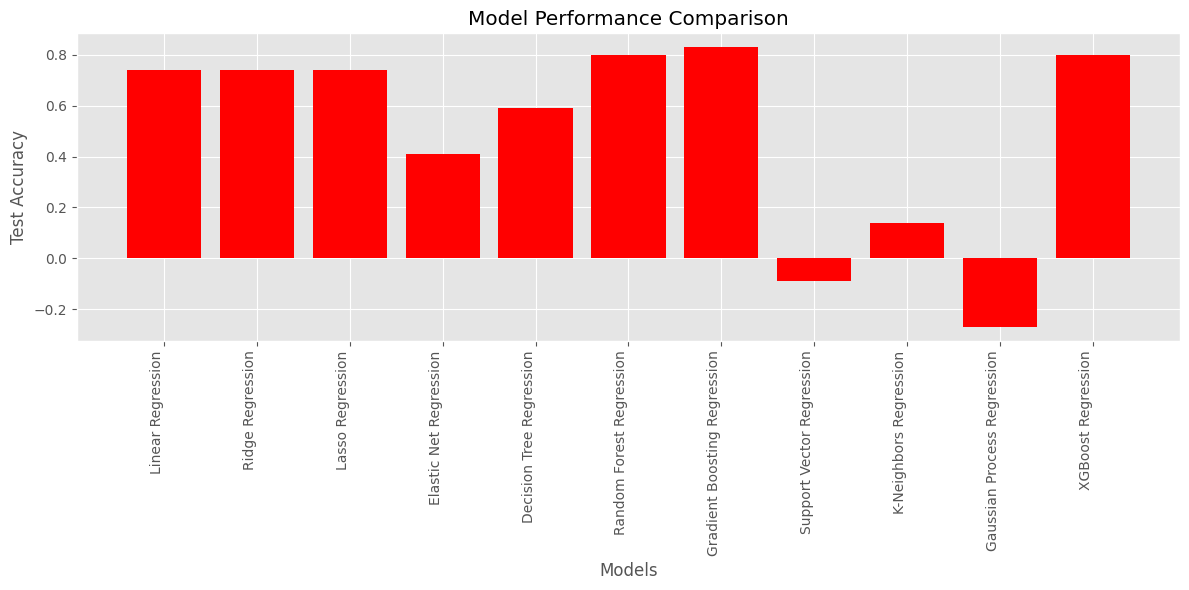

In [43]:
# prompt: create the bar graph for all the model based on accuracy

import matplotlib.pyplot as plt

# Assuming 'models' dictionary and evaluation results are available from previous code
# Example data (replace with your actual model names and accuracies):
model_names = list(models.keys())
test_accuracies = [0.74, 0.74, 0.74, 0.41, 0.59, 0.80, 0.83, -0.09, 0.14, -0.27, 0.80] # Example accuracies

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(model_names, test_accuracies, color='red')
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


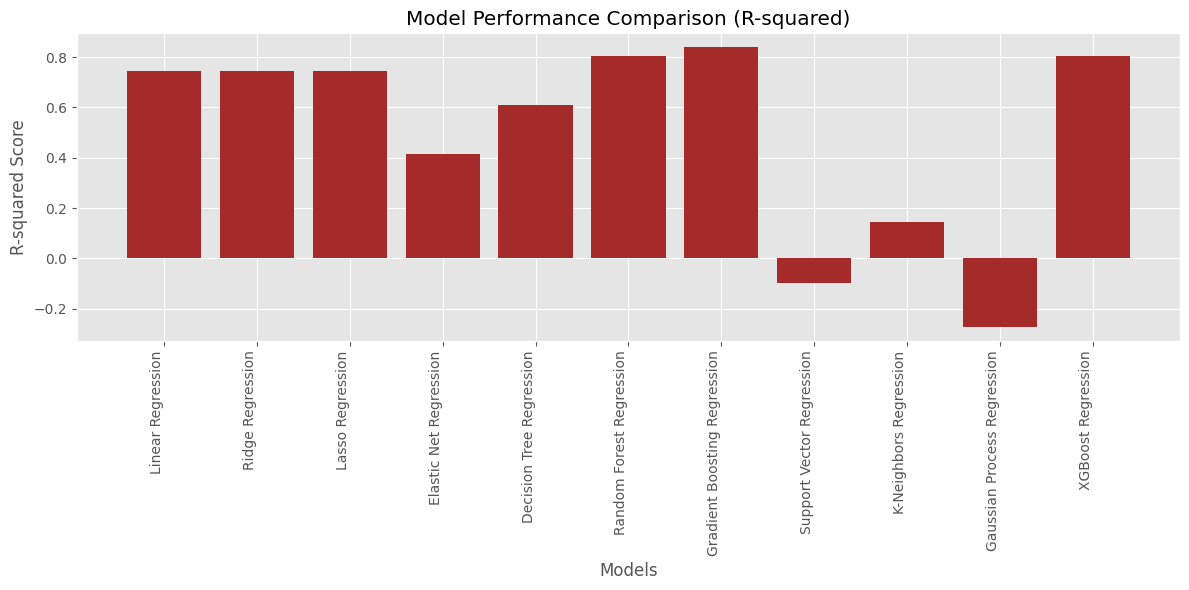

In [44]:

## Claculate the r2 score
model_names = list(models.keys())
r2_scores = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(model_names, r2_scores, color='brown')
plt.xlabel("Models")
plt.ylabel("R-squared Score")
plt.title("Model Performance Comparison (R-squared)")
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [45]:

# Find the best model based on test accuracy
best_model_name = max(models, key=lambda k: models[k].score(x_test, y_test))
best_model = models[best_model_name]

print(f"Best model based on test accuracy: {best_model_name}")



Best model based on test accuracy: Gradient Boosting Regression


In [46]:
# Hyperparameter tuning for the best model using GridSearchCV (example for RandomForestRegressor)
from sklearn.model_selection import GridSearchCV

if best_model_name == 'Random Forest Regression':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {best_params}")
    # Evaluate the tuned model
    y_pred = best_model.predict(x_test)
    test_accuracy = r2_score(y_test, y_pred)
    print(f"Test accuracy after hyperparameter tuning: {test_accuracy}")

elif best_model_name == 'Gradient Boosting Regression':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
    grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {best_params}")
    y_pred = best_model.predict(x_test)
    test_accuracy = r2_score(y_test, y_pred)
    print(f"Test accuracy after hyperparameter tuning: {test_accuracy}")

elif best_model_name == 'XGBoost Regression':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }

    grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {best_params}")
    y_pred = best_model.predict(x_test)
    test_accuracy = r2_score(y_test, y_pred)
    print(f"Test accuracy after hyperparameter tuning: {test_accuracy}")
else:
    print(f"Hyperparameter tuning not implemented for {best_model_name}")


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Test accuracy after hyperparameter tuning: 0.8391517057515531


In [47]:

import pickle


# Save the model to a file
filename = 'finalized_model_2.pkl'
pickle.dump(best_model, open(filename, 'wb'))


In [56]:
# prompt: test this model into new data and predict the charges

import pandas as pd
import numpy as np
import pickle

# Load the saved model
filename = 'finalized_model_2.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

# New data for prediction (replace with your actual data)
new_data = pd.DataFrame({
    'age': [18],
    'sex': [1],  # Assuming label encoded values
    'bmi': [33.770],
    'children': [1],
    'smoker': [0], # Assuming label encoded values
    'region': [2]   # Assuming label encoded values
})

# Make predictions using the loaded model
new_predictions = loaded_model.predict(new_data)
print(f"Predicted charges for new data: {new_predictions}")


Predicted charges for new data: [3628.47271749]


In [49]:
df_no_outliers.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [50]:
# prompt: check the version ofsklearn

import sklearn
sklearn.__version__


'1.6.1'

In [51]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [59]:
# prompt: Give the attractive , creative visualization , and impressive Gradio code for this project and also the output is Charges which is in dollar so change this into rupees and also show the both in the ouput.

import gradio as gr
import pandas as pd
import pickle
import numpy as np

# Load the saved model
filename = 'finalized_model_2.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

def predict_charges(age, sex, bmi, children, smoker, region):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })

    # Make predictions
    charges_usd = loaded_model.predict(input_data)[0]
    # Convert USD to INR (using a fixed exchange rate for simplicity)
    exchange_rate = 83.5  # Replace with a dynamic rate if needed
    charges_inr = charges_usd * exchange_rate
    return f"${charges_usd:.2f}", f"₹{charges_inr:.2f}"


iface = gr.Interface(
    fn=predict_charges,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female"], label="Sex", type="index"),
        gr.Number(label="BMI"),
        gr.Number(label="Children"),
        gr.Radio(["Yes", "No"], label="Smoker", type="index"),
        gr.Radio(["Northeast", "Northwest", "Southeast", "Southwest"], label="Region", type="index"),
    ],
    outputs=[
        gr.Textbox(label="Charges (USD)"),
        gr.Textbox(label="Charges (INR)")
    ],
    title="Medical Insurance Cost Prediction",
    description="Predict medical costs based on individual details.",
    theme=gr.themes.Soft(),  # Use a visually appealing theme
)

iface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6ed3afae5819eed76f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6ed3afae5819eed76f.gradio.live


In [57]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030
